In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import warnings
warnings.filterwarnings('ignore')

### PREPROCESSING 

In [2]:
df = pd.read_excel('../DATASET/Updated_Dataset/Airlinewise Monthly International Air Traffic To And From The Indian Territory Excel.xlsx')

In [3]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680


In [4]:
df.tail()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
4249,2018,DEC,Q4,UNITED PARCEL SERVICES,FOREIGN,0.0,0,502.042,448.598
4250,2018,DEC,Q4,US BANGLA AIRLINES,FOREIGN,8173.0,7212,0.000,52.235
4251,2018,DEC,Q4,UZBEKISTAN AIRWAYS,FOREIGN,6473.0,4584,5.136,145.244
4252,2018,DEC,Q4,VIRGIN ATLANTIC AIRLINES,FOREIGN,7554.0,5802,345.235,437.329
4253,2018,DEC,Q4,YEMENIA AIRWAYS,FOREIGN,949.0,764,0.000,6.665


In [5]:
df['MONTH'].value_counts()

OCT    359
DEC    359
NOV    359
MAR    358
MAY    358
FEB    358
JAN    358
JUN    358
APR    358
SEP    343
JUL    343
AUG    343
Name: MONTH, dtype: int64

In [6]:
df['MONTH'] = df['MONTH'].map({'JAN':1,'FEB':2, 'MAR':3, 'APR':4,'MAY':5,'JUN':6, 'JUL':7, 'AUG':8,'SEP':9,\
                               'OCT':10, 'NOV':11, 'DEC':12})

df['DATE'] = pd.to_datetime(df.YEAR.astype(str) + '-' + df.MONTH.astype(str))
df['DATE'] =  df['DATE'] + pd.offsets.MonthEnd()

In [7]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,DATE
0,2015,1,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,2015-01-31
1,2015,1,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,2015-01-31
2,2015,1,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,2015-01-31
3,2015,1,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,2015-01-31
4,2015,1,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,2015-01-31


---

In [8]:
df.set_index(['DATE'],inplace=True)

### PASSENGERS TO INDIA 

Series 

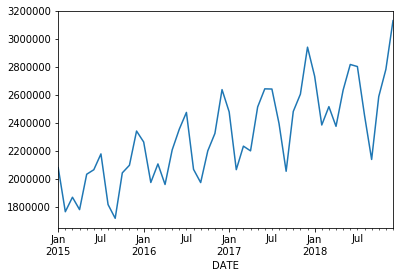

In [9]:
df.groupby(['DATE'])['PASSENGERS TO INDIA'].sum().plot()
plt.show()

In [10]:
pp =  df.groupby(['DATE'])['PASSENGERS TO INDIA'].sum()
pp_df = df.groupby(['DATE'])[['PASSENGERS TO INDIA']].sum()

Test 

In [11]:
pax_to_india_2019 = [2890576, 2438441 , 2515561 , 2684946, 2562439 , 2802753]

---

## IGNORE !
#### MASTER FUNCTIONS

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ********************Stationarity Check*******************************
def test_stationarity(timeseries,col):
    
    rollmean_diff = timeseries.rolling(12).mean()
    rollstd_diff = timeseries.rolling(12).std()

    plt.figure(figsize=(5,3))
    plt.plot(timeseries)
    plt.plot(rollmean_diff)
    plt.plot(rollstd_diff,color='black')
    
    result = adfuller(timeseries[col].dropna()) 
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1])
    plt.show()
    

# ********************Transformation Function*************************************
def tansformation_function(timeseries,col):
    
    # -------Decomposition--------- 
    
    # Multiplicative Decomposition 
    result_mul = seasonal_decompose(timeseries.dropna(), model='multiplicative', extrapolate_trend='freq')

    # Additive Decomposition
    result_add = seasonal_decompose(timeseries.dropna(), model='additive', extrapolate_trend='freq')

    # Plot
    plt.rcParams.update({'figure.figsize': (5,3)}) 
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10) 
    result_add.plot().suptitle('Additive Decompose', fontsize=10) 
    plt.show()
    
    # -------Test Transformations----------
    
    # Original Series 
    print('Original Series')
    test_stationarity(timeseries,col)
    
    # Log Transformation 
    print('Log Transformation')
    timeseries_log = np.log(timeseries)
    test_stationarity(timeseries_log,col)
    
    # Log Minus Moving Average 
    print('Log Minus Moving Average')
    movingAvg = timeseries_log.rolling(12).mean()
    timeseries_log_moving = timeseries_log - movingAvg
    timeseries_log_moving.dropna(inplace=True)
    test_stationarity(timeseries_log_moving,col)
    
    # Log Differencing 
    print('Log Differencing')
    timeseries_log_diff = timeseries_log.diff()
    timeseries_log_diff.dropna(inplace=True)
    test_stationarity(timeseries_log_diff,col)
    
    
    
# **************************Parameter Function**************************888

def model_parameter(timeseries,col):
    
    # N-order Differencing 
    print('N-order Differencing')
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

    plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
    fig, axes = plt.subplots(3, 2, sharex=True)

    axes[0, 0].plot(timeseries.values); axes[0, 0].set_title('Original Series') 
    plot_acf(pp.values, ax=axes[0, 1])
   

    axes[1, 0].plot(timeseries[col].diff().values); axes[1, 0].set_title('1st Order Differencing') 
    plot_acf(pp_df[col].diff().dropna().values, ax=axes[1, 1])

    axes[2, 0].plot(timeseries[col].diff().diff().values); axes[2, 0].set_title('2nd Order Differencing') 
    plot_acf(pp_df[col].diff().diff().dropna().values, ax=axes[2, 1]) 
    plt.show()
    
    # Finding p and q
    plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
    plot_pacf(timeseries.dropna())
    plt.show()
    
    plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
    plot_acf(timeseries.dropna())
    plt.show()
    

----

---

---

### Decomposition 

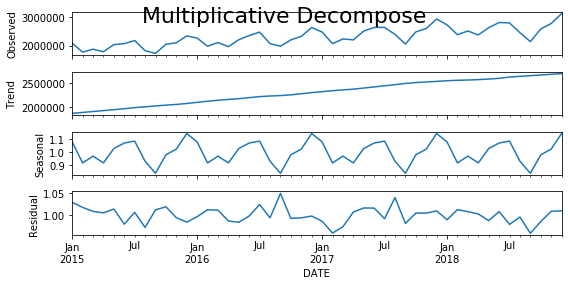

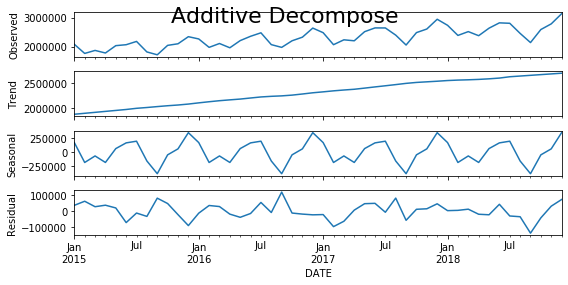

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(pp_df.dropna(), model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(pp_df.dropna(), model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,4)}) 
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22) 
result_add.plot().suptitle('Additive Decompose', fontsize=22) 
plt.show()

### TEST FOR STATIONARITY ( ADF ) / ROLLING 

NULL HYPOTHESIS : NOT STATIONARY 

In [14]:
def test_stationarity(timeseries):
    
    rollmean_diff = timeseries.rolling(12).mean()
    rollstd_diff = timeseries.rolling(12).std()

    plt.figure(figsize=(8,4))
    plt.plot(timeseries)
    plt.plot(rollmean_diff)
    plt.plot(rollstd_diff,color='black')
    
    result = adfuller(timeseries['PASSENGERS TO INDIA'].dropna()) 
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1])

Original Series 

ADF Statistic: -0.776297
p-value: 0.825986


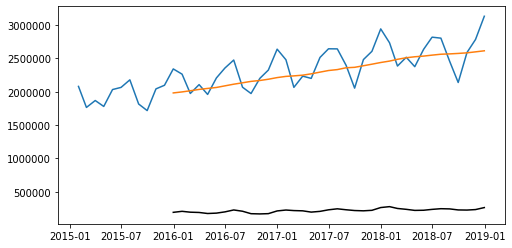

In [15]:
test_stationarity(pp_df)

LOG Transformation 

ADF Statistic: -1.183684
p-value: 0.680575


<Figure size 576x288 with 0 Axes>

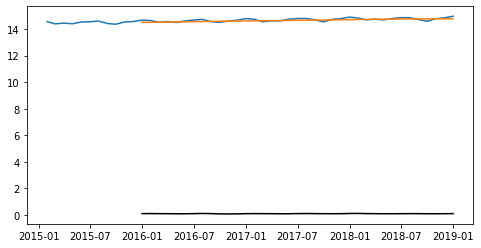

In [16]:
plt.figure(figsize=(8,4))
pp_df_log = np.log(pp_df)
test_stationarity(pp_df_log)

Log Minus Weighted Average 

ADF Statistic: -1.896499
p-value: 0.333710


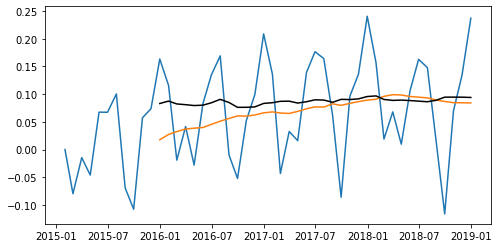

In [17]:
weightedAvg = pp_df_log.ewm(halflife=12).mean()

pp_df_log_weighted = pp_df_log - weightedAvg
pp_df_log_weighted.dropna(inplace=True)

test_stationarity(pp_df_log_weighted)

Log Minus Moving Average 

ADF Statistic: -3.026959
p-value: 0.032452


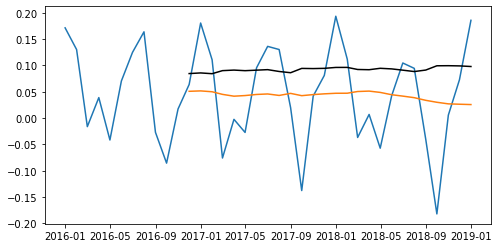

In [18]:
movingAvg = pp_df_log.rolling(12).mean()

pp_df_log_moving = pp_df_log - movingAvg
pp_df_log_moving.dropna(inplace=True)

test_stationarity(pp_df_log_moving)

LOG Differencing 

ADF Statistic: -5.080183
p-value: 0.000015


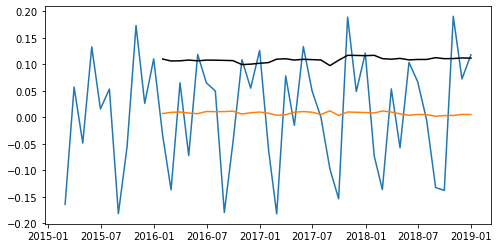

In [19]:
pp_df_log_diff = pp_df_log.diff()
pp_df_log_diff.dropna(inplace=True)

test_stationarity(pp_df_log_diff)

Differencing 

ADF Statistic: -5.653744
p-value: 0.000001


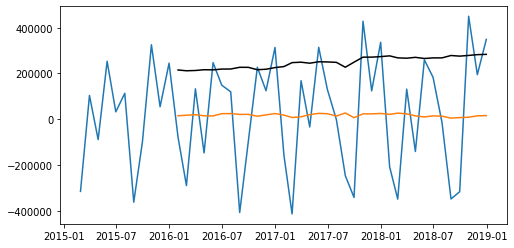

In [20]:
pp_df_diff = pp_df.diff()

test_stationarity(pp_df_diff)

---

### FINDING MODEL PARAMETERS (p,d,q)(P,D,Q)m

#### Finding - d

N-order Differencing 

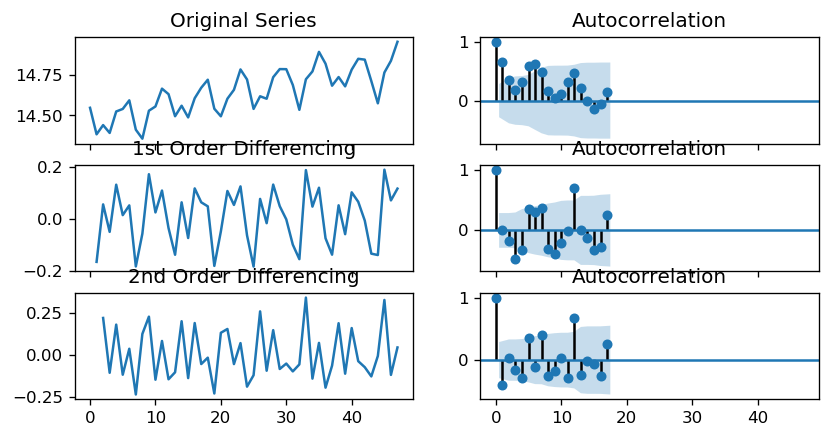

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(pp_df_log.values); axes[0, 0].set_title('Original Series') 
plot_acf(pp.values, ax=axes[0, 1])

axes[1, 0].plot(pp_df_log['PASSENGERS TO INDIA'].diff().values); axes[1, 0].set_title('1st Order Differencing') 
plot_acf(pp_df['PASSENGERS TO INDIA'].diff().dropna().values, ax=axes[1, 1])

axes[2, 0].plot(pp_df_log['PASSENGERS TO INDIA'].diff().diff().values); axes[2, 0].set_title('2nd Order Differencing') 
plot_acf(pp_df['PASSENGERS TO INDIA'].diff().diff().dropna().values, ax=axes[2, 1]) 
plt.show()

---

#### Finding - p and q

p - VALUE ( PARTIAL ) 

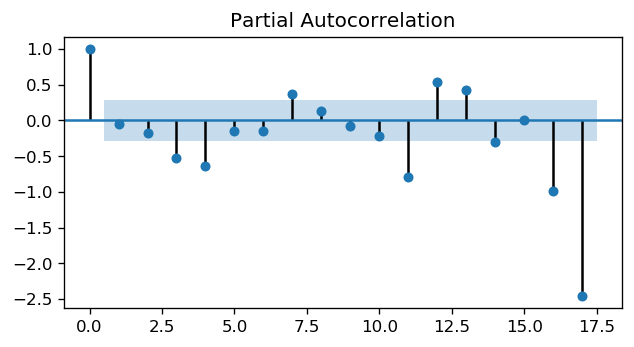

In [22]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plot_pacf(pp_df_log_diff.dropna())
plt.show()

q - VALUE (ATOCORELATION)

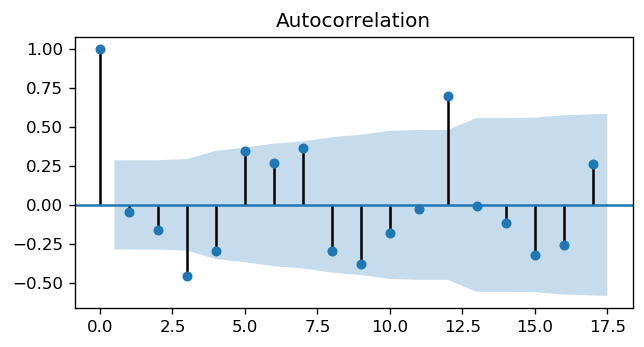

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plot_acf(pp_df_log_diff.dropna())

plt.show()

---

### ARIMA

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model = ARIMA(pp_df_log.values, order=(4,1,0)) 

model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   47
Model:                 ARIMA(4, 1, 0)   Log Likelihood                  61.467
Method:                       css-mle   S.D. of innovations              0.063
Date:                Wed, 15 Jan 2020   AIC                           -110.934
Time:                        14:40:46   BIC                            -99.834
Sample:                             1   HQIC                          -106.757
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.003      2.545      0.015       0.002       0.013
ar.L1.D.y     -0.5534      0.104     -5.329      0.000      -0.757      -0.350
ar.L2.D.y     -0.4079      0.094     -4.337      0.0

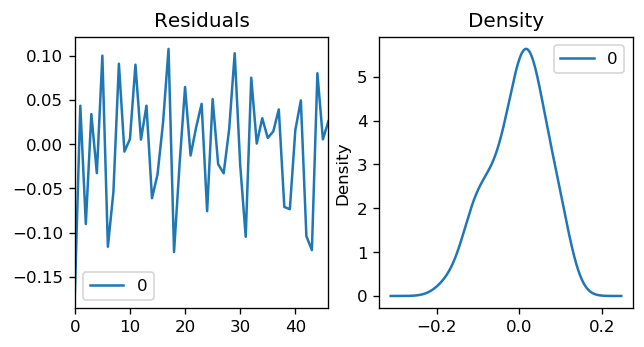

In [26]:
# Plot residual errors 
residuals = pd.DataFrame(model_fit.resid) 
fig, ax = plt.subplots(1,2) 
residuals.plot(title="Residuals", ax=ax[0]) 
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

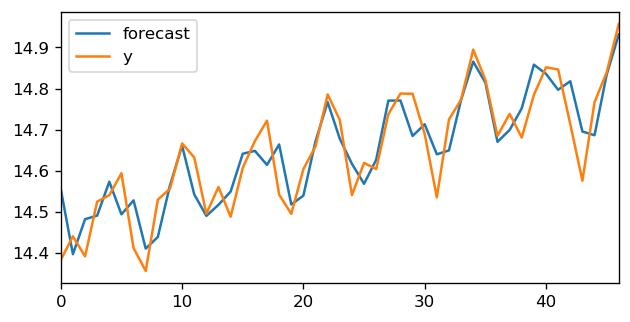

In [27]:
# Actual vs Fitted 
model_fit.plot_predict(dynamic=False)
plt.show()

In [28]:
np.exp(model_fit.forecast(6)[0])

array([2832568.9612704 , 2433988.1921979 , 2481045.10552832,
       2632119.85096039, 3076212.44999004, 3101857.92284226])

In [29]:
pax_to_india_2019

[2890576, 2438441, 2515561, 2684946, 2562439, 2802753]

RMSE

In [30]:
np.sqrt(mean_squared_error(pax_to_india_2019,np.exp(model_fit.forecast(6)[0])))

245218.78184462697

### SARIMA

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.statespace.SARIMAX(endog=pp_df_log.values,order=(0,1,0),seasonal_order=(0,1,0,12),trend='n',\
                                enforce_invertibility=False , random_state=20)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  64.570
Date:                            Wed, 15 Jan 2020   AIC                           -127.141
Time:                                    14:40:53   BIC                           -125.586
Sample:                                         0   HQIC                          -126.604
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0015      0.000      4.844      0.000       0.001       0.002
Ljung-Box (Q):                     

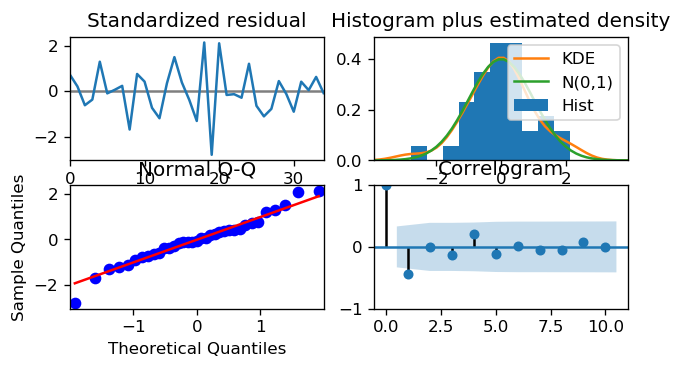

In [33]:
results.plot_diagnostics()
plt.show()

#### FORECAST 

In [34]:
np.exp(results.forecast(6))

array([2910500.44953612, 2538983.48530211, 2678848.98341617,
       2528829.99126532, 2804998.00316327, 3000010.45085605])

In [35]:
pax_to_india_2019 = [2890576, 2458441 , 2645561 , 2564946, 2862439 , 3012753]

RMSE

In [36]:
np.sqrt(mean_squared_error(pax_to_india_2019,np.exp(results.forecast(6))))

46112.854735383706

In [37]:
pd.date_range('2019-01-01', '2020-01-01',freq='M')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

#### 2019 Forecasted 

(array([737091., 737119., 737150., 737180., 737211., 737241.]),
 <a list of 6 Text xticklabel objects>)

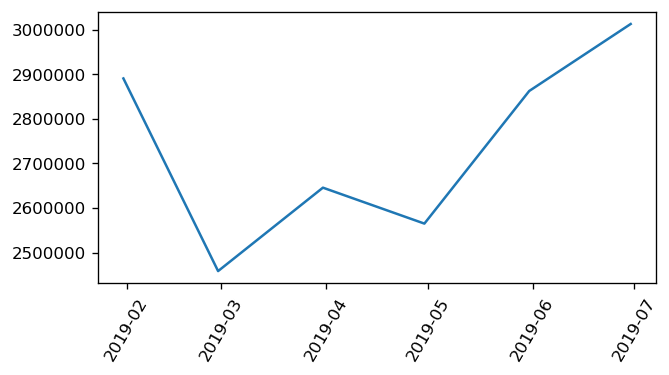

In [38]:
plt.plot(pd.date_range('2019-01-01', '2019-07-01',freq='M'),pax_to_india_2019)
plt.xticks(rotation=60)

#### 2025 Forecasted 

(array([737060., 737425., 737791., 738156., 738521., 738886., 739252.,
        739617.]), <a list of 8 Text xticklabel objects>)

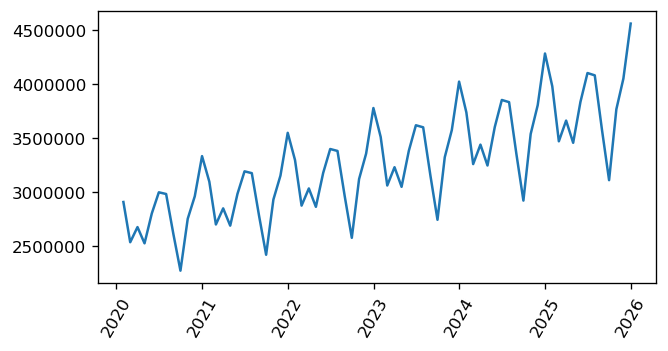

In [39]:
plt.plot(pd.date_range('2020-01-01', '2026-01-01',freq='M'),np.exp(results.forecast(72)))
plt.xticks(rotation=60)

#### Original Series 

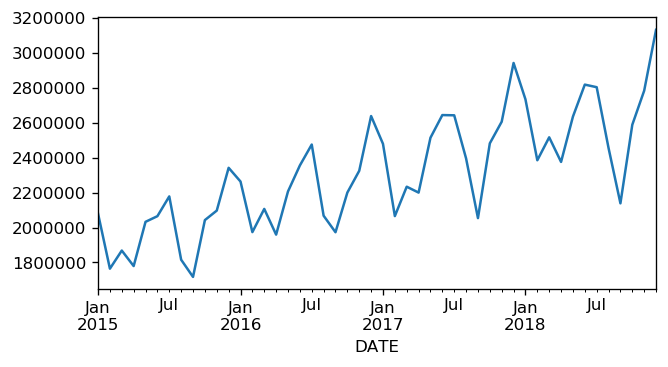

In [40]:
df.groupby(['DATE'])['PASSENGERS TO INDIA'].sum().plot()
plt.show()

MAE

In [41]:
mean_absolute_error(pax_to_india_2019,np.exp(results.forecast(6)))http://localhost:8888/notebooks/Desktop/Capstone%20Project/Jupyter%20Notebooks/Forecast_Passenger_To_India.ipynb#

SyntaxError: invalid syntax (<ipython-input-41-2f92bb0b071e>, line 1)

#### LJUNG-BOX TEST 

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
acorr_ljungbox(results.resid,lags=24)

In [ ]:
plt.plot(acorr_ljungbox(results.resid,lags=24)[1])
plt.axhline(0.050,color='r')

In [ ]:
results.resid.mean()

-----

### AUTO ARIMA 

In [ ]:
from pmdarima.arima import auto_arima

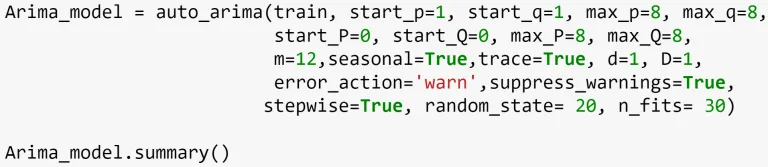


In [ ]:
auto = auto_arima( pp_df_log.values , start_p=1 , start_q=1 , max_p=8 , max_q=8 ,\
                   start_P=0 , start_Q=0, max_P=9 , max_Q=8 ,
                   m=12 ,\
                   d=1 ,\
                   D=1 , \
                   seasonal=True ,\
                   trace=True , stepwise=True ,\
                   error_action='warn' , suppress_warnings=True , random_state=20 , n_fits=100 , trend='ct')

In [ ]:
auto.summary()

In [ ]:
auto.plot_diagnostics()
plt.show()

---

#### Saving Forecast Data 

In [ ]:
p_to_india_forecast = pd.DataFrame({'DATE': pd.date_range('2019-01-01', '2026-01-01',freq='M') , 'PAX_TO_INDIA':list(np.exp(results.forecast(84)))})

In [ ]:
p_to_india_forecast['PAX_TO_INDIA'] = p_to_india_forecast['PAX_TO_INDIA'].astype(int)
p_to_india_forecast

In [ ]:
p_to_india_forecast.groupby(p_to_india_forecast['DATE'].dt.year).sum()

Pax from India 

In [ ]:
p_from_india_forecast = pd.read_excel('./Forecast_Passenger_From_India_DATA.xlsx')
p_from_india_forecast.drop('Unnamed: 0',1,inplace=True)
p_from_india_forecast

#### Total PAX Forecast

In [ ]:
total_passenger_forecast = p_to_india_forecast
total_passenger_forecast['PAX_FROM_INDIA'] = p_from_india_forecast['PAX']
total_passenger_forecast['TOTAL_PAX'] = total_passenger_forecast['PAX_FROM_INDIA']+total_passenger_forecast['PAX_TO_INDIA']
total_passenger_forecast

In [ ]:
total_passenger_forecast.to_excel('Forecast_Total_Passenger.xlsx',index=False)

---